In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("../input/digit-recognizer/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data[0]
X_dev = data[1:n] / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

def Relu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_Relu(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_Relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2
    

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if(i % 10 == 0):
            print("Iterations: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iterations:  0
[6 2 6 ... 2 0 0] [7 0 5 ... 2 2 1]
Accuracy:  0.08773170731707317
Iterations:  10
[7 2 1 ... 2 0 1] [7 0 5 ... 2 2 1]
Accuracy:  0.24334146341463414
Iterations:  20
[7 4 1 ... 2 0 1] [7 0 5 ... 2 2 1]
Accuracy:  0.3658780487804878
Iterations:  30
[7 4 1 ... 2 3 1] [7 0 5 ... 2 2 1]
Accuracy:  0.44458536585365854
Iterations:  40
[7 0 1 ... 2 8 1] [7 0 5 ... 2 2 1]
Accuracy:  0.5094390243902439
Iterations:  50
[7 0 1 ... 2 8 1] [7 0 5 ... 2 2 1]
Accuracy:  0.5622926829268293
Iterations:  60
[7 0 1 ... 2 8 1] [7 0 5 ... 2 2 1]
Accuracy:  0.6034146341463414
Iterations:  70
[7 0 1 ... 2 8 1] [7 0 5 ... 2 2 1]
Accuracy:  0.636219512195122
Iterations:  80
[7 0 8 ... 2 8 1] [7 0 5 ... 2 2 1]
Accuracy:  0.6642682926829269
Iterations:  90
[7 0 8 ... 2 8 1] [7 0 5 ... 2 2 1]
Accuracy:  0.6881951219512195
Iterations:  100
[7 0 8 ... 2 8 1] [7 0 5 ... 2 2 1]
Accuracy:  0.7089756097560975
Iterations:  110
[7 0 8 ... 2 2 1] [7 0 5 ... 2 2 1]
Accuracy:  0.725780487804878
Iterations:  1

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [9]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


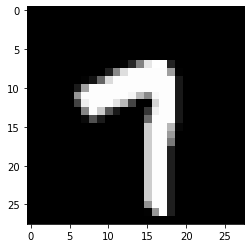

Prediction:  [1]
Label:  1


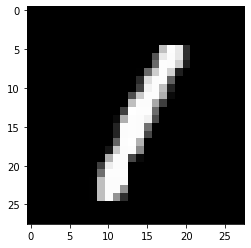

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)